# Method

Design a method that will be able to retrieve the K most similar instances to a
given instance (instance in our case is an academic paper). 

In addition, your method is required to retrieve the actual distance found between the K instances and the given instance.

Your method must use ONLY the text data provided in the Kaggle competition. 

In addition, you MUST use, as the primal tool, ANY compression application or tool of your choice. 

Please note that you can plug (as a black-box) the compression application to a learning process, which in turn will act as a “meta” learning algorithm. 

The compression output will be used as the “distance” measure, to be furthered be used for returning the K most similar instances.

# Method Design

As we already familiar with NLP techniques, semantic meaning, and thier appliacations.  

We propose a method consists of Embeddings.

We will use the `awesome` BERT model to convert sentences to a latent space of 768 dimentions, while keeping a huge amount of the sementic meaning of the word.  
`input: text`  
`output: vector`  

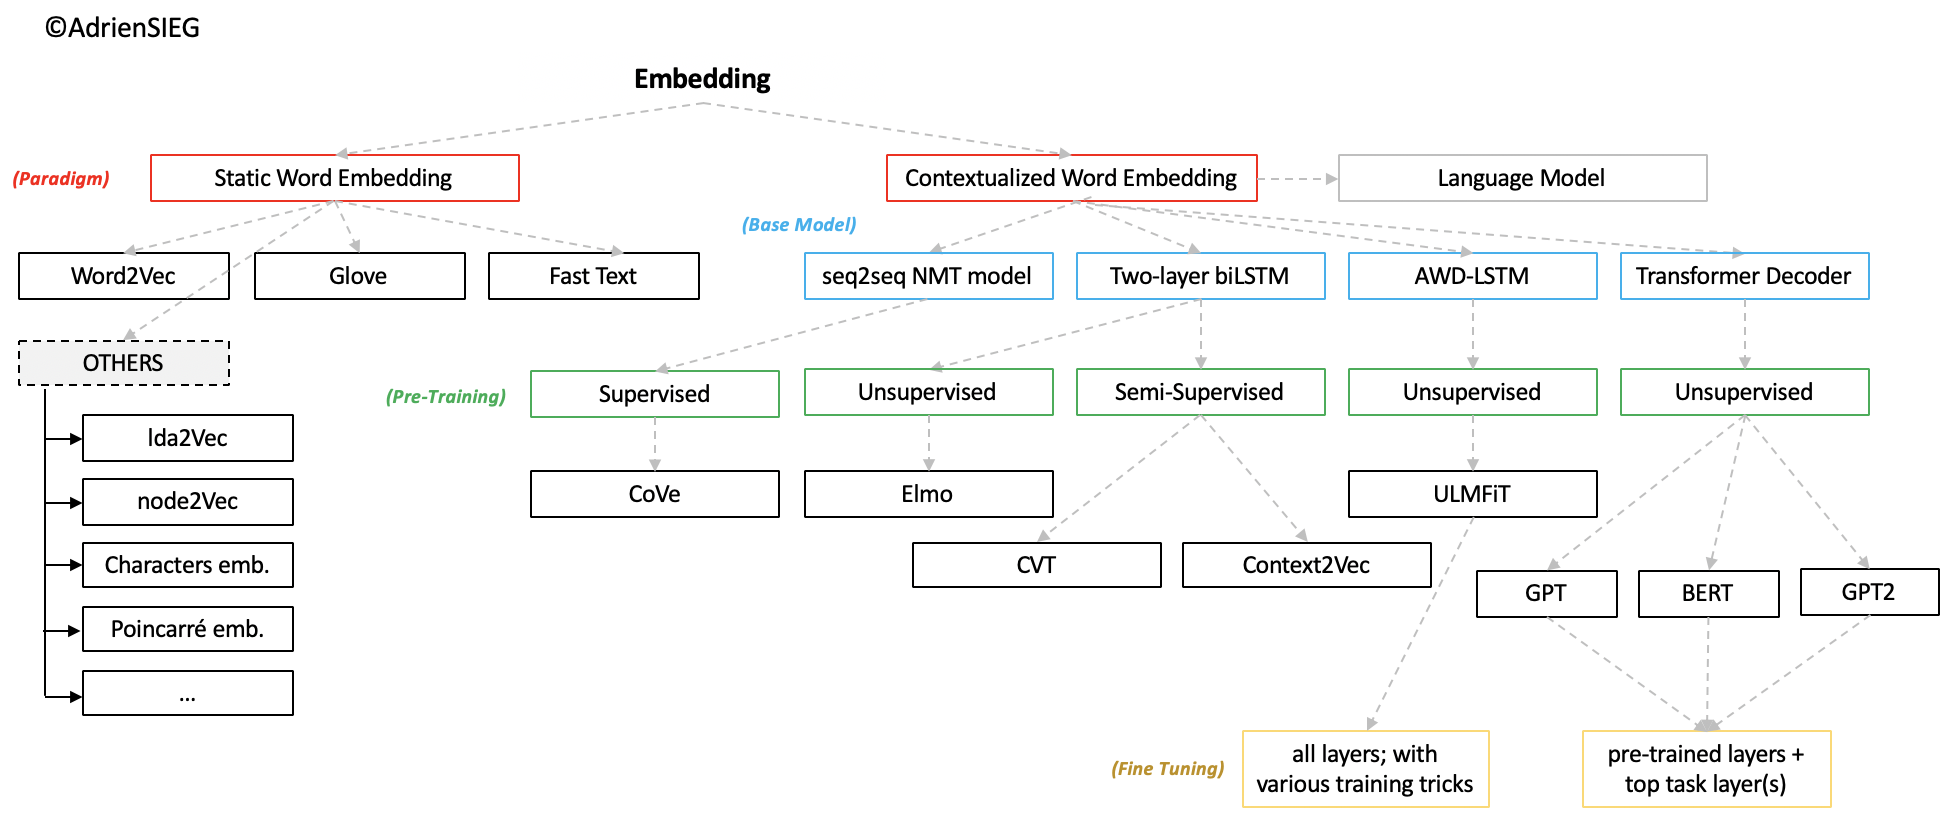

<br>
<br>

Following this, we will use `cosine similarity` to get a numeric metric for the "closness" of these sentenses at the latent(vector) space.


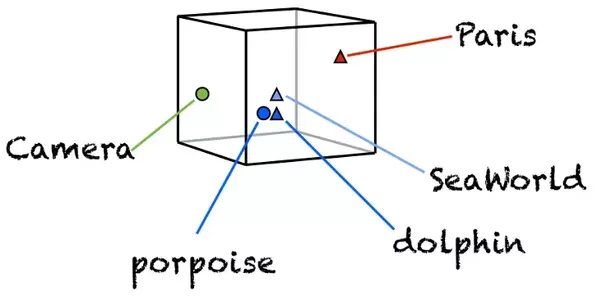

Code example:

In [ ]:
!pip install sentence_transformers

In [ ]:
import numpy as np

from sentence_transformers import SentenceTransformer

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

## Let's create some sentences:

In [ ]:
sentences = {
             'A* search':'Graph search algorithm that finds a path from a given initial node to a given goal node. It employs a heuristic estimate that ranks each node by an estimate of the best route that goes through that node. It visits the nodes in order of this heuristic estimate. The A* algorithm is therefore an example of best-first search.',
             'Binary search':'Technique for finding a particular value in a linear array, by ruling out half of the data at each step.',
             'Branch and bound':'A general algorithmic method for finding optimal solutions of various optimization problems, especially in discrete and combinatorial optimization.',
             'Buchberger':'In computational algebraic geometry and computational commutative algebra, Buchbergers algorithm is a method of transforming a given set of generators for a polynomial ideal into a Gröbner basis with respect to some monomial order. One can view it as a generalization of the Euclidean algorithm for univariate gcd computation and of Gaussian elimination for linear systems.',
             'Data compression':'Data compression or source coding is the process of encoding information using fewer bits (or other information-bearing units) than an unencoded representation would use through use of specific encoding schemes.',
             'Diffie-Hellman':'Cryptographic protocol which allows two parties that have no prior knowledge of each other to jointly establish a shared secret key over an insecure communications channel. This key can then be used to encrypt subsequent communications using a symmetric key cipher.',
             'Dijkstra':'Algorithm that solves the single-source shortest path problem for a directed graph with nonnegative edge weights.',
             'Dynamic programming':'Dynamic programming is a method for reducing the runtime of algorithms exhibiting the properties of overlapping subproblems and optimal substructure, described below.',
             'Euclidean Algorithm':'Algorithm to determine the greatest common divisor (gcd) of two integers. It is one of the oldest algorithms known, since it appeared in Euclids Elements around 300 BC. The algorithm does not require factoring the two integers.',
             'Gradient descent':'Gradient descent is an optimization algorithm that approaches a local minimum of a function by taking steps proportional to the negative of the gradient (or the approximate gradient) of the function at the current point. If instead one takes steps proportional to the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.',
             'Merge sort':'A sorting algorithm for rearranging lists (or any other data structure that can only be accessed sequentially, e.g. file streams) into a specified order.',
             'Q-learning':'Q-learning is a reinforcement learning technique that works by learning an action-value function that gives the expected utility of taking a given action in a given state and following a fixed policy thereafter. A strength with Q-learning is that it is able to compare the expected utility of the available actions without requiring a model of the environment.'
             }

In [ ]:
sentence = {'Viterbi':'Dynamic programming algorithm for finding the most likely sequence of hidden states - known as the Viterbi path - that result in a sequence of observed events, especially in the context of hidden Markov models.'}

## Let's embedd these sentences:

In [ ]:
sentences_embeddings = bert_model.encode(list(sentences.values()))
sentences_embeddings.shape

(12, 768)

In [ ]:
sentence_embeddings = bert_model.encode(list(sentence.values()))
sentence_embeddings.shape

(1, 768)

## Let check out the similarity between the sentences with cosine similarity:
We Used Cosine similarity but we could have used distance like: Euclidean,Manhattan, etc.  
It's just that cosine is the most common metric to use while ussing embeddings.  
Also, it means that the **higher the score - there is a higher similarity.**  


In [ ]:
sims = cosine_similarity(sentence_embeddings, sentences_embeddings)[0]
sims

array([0.64920175, 0.5389736 , 0.6814823 , 0.59015346, 0.45293194,
       0.5909177 , 0.54322153, 0.70352376, 0.2859133 , 0.6146493 ,
       0.5956373 , 0.6785153 ], dtype=float32)

In [ ]:
indicies,sims_sort = sims.argsort()[::-1] , sorted(sims)[::-1]
algos = np.array(list(sentences.keys()))[indicies]

print('find similar to: ',list(sentence.keys())[0])

print('\nrank most similar:')
[print(algo, sim) for algo,sim in zip(algos,sims_sort)];

find similar to:  Viterbi

rank most similar:
Dynamic programming 0.70352376
Branch and bound 0.6814823
Q-learning 0.6785153
A* search 0.64920175
Gradient descent 0.6146493
Merge sort 0.5956373
Diffie-Hellman 0.5909177
Buchberger 0.59015346
Dijkstra 0.54322153
Binary search 0.5389736
Data compression 0.45293194
Euclidean Algorithm 0.2859133


**Which is great! cuz DP & Viterbi are very similar.**


<br><br><br><br><br><br><br>
## Let's create the method:

In [ ]:
def get_k_similar(list_sentence,list_sentences,k):
  sentences_embeddings = bert_model.encode(list_sentences)
  sentence_embeddings = bert_model.encode(list_sentence)

  sims = cosine_similarity(sentence_embeddings, sentences_embeddings)[0]

  indicies = sims.argsort()[::-1]
  metric = sorted(sims)[::-1]

  return indicies[:k],metric[:k]

## sanity check:

In [ ]:
k = 3
list_sentence = list(sentence.values())
list_sentences = list(sentences.values())

indicies,sims_sort = get_k_similar(list_sentence,list_sentences,k)
algos = np.array(list(sentences.keys()))[indicies]

print('find similar to: ',list(sentence.keys())[0])

print('\nrank ',k, ' most similar:')
[print(algo, sim) for algo,sim in zip(algos,sims_sort)];

find similar to:  Viterbi

rank 3 most similar:
Dynamic programming 0.70352376
Branch and bound 0.6814823
Q-learning 0.6785153
